In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
%matplotlib inline

db = client['facebook']
friends_table = db['friends']
rmfriends_table = db['removed_friends']
post_com_table = db['posts_and_comments']
search_hist_table = db['your_search_history']
profile_table = db['profile_information']
location_table = db['location_history']
login_loc_table = db['where_you_login_from']
profile_update_table = db['profile_update_history']
login_out_table = db['logins_and_logouts']
activity_table = db['account_activity']

db.list_collection_names()

['removed_friends',
 'comments',
 'posts_and_comments',
 'sent_friend_requests',
 'news_topics_for_recommendations',
 'notes',
 'your_search_history',
 'unfollowed_pages',
 'likes_on_external_sites',
 'location_history',
 'used_ip_addresses',
 'facebook_watch_topics_for_recommendations',
 'profile_information',
 'people',
 'menu_items',
 'account_activity',
 'where_you_login_from',
 'rejected_friend_requests',
 'friends',
 'last_location',
 'recieved_friend_requests',
 'profile_update_history',
 'news_feed_topics_for_recommendations',
 'logins_and_logouts',
 'primary_location',
 'followers',
 'pages',
 'following']

In [2]:
print("Facebook has recorded {} people I'm friends with.".format(str(len(friends_table.find_one()['friends']))))

Facebook has recorded 836 people I'm friends with.


In [3]:
#print(location_table.find_one()['location_history'])
print("Facebook has {} location points on me.".format(str(len(location_table.find_one()['location_history']))))

Facebook has 14512 location points on me.


In [4]:
#print(login_loc_table.find_one())
print("Facebook has recorded me logging in from {} locations".format(str(len(login_loc_table.find_one()['active_sessions']))))

Facebook has recorded me logging in from 14 locations


In [5]:
#print(search_hist_table.find_one()['searches'])
print("Facebook has recorded {} of my searches.".format(str(len(search_hist_table.find_one()['searches']))))

Facebook has recorded 891 of my searches.


In [6]:
len(login_out_table.find_one()['account_accesses'])
print("Facebook has tracked my logins from {} different locations.".format(str(len(login_out_table.find_one()['account_accesses']))))

Facebook has tracked my logins from 13 different locations.


In [67]:
#print(activity_table.find_one()['account_activity'])
print("Facebook has tracked my activity with {} points.".format(str(len(activity_table.find_one()['account_activity']))))

Facebook has tracked my activity with 778 points.


In [7]:
# Digging into the location data
location_df = pd.DataFrame(location_table.find_one()['location_history'])

In [8]:
location_df.head()

,coordinate,creation_timestamp,name
0,"{'latitude': 37.75698, 'longitude': -122.42097}",1569600790,San Francisco
1,"{'latitude': 37.75703, 'longitude': -122.42094}",1569587385,San Francisco
2,"{'latitude': 37.7571, 'longitude': -122.42098}",1569559743,San Francisco
3,"{'latitude': 37.75712, 'longitude': -122.42099}",1569535934,San Francisco
4,"{'latitude': 37.75713, 'longitude': -122.42098}",1569452781,San Francisco


In [9]:
#getting the data into a useable format

location_df['ts'] = pd.to_datetime(location_df['creation_timestamp'], unit='s')
location_tm_df = location_df.sort_values('ts')
location_tm_df.head()
coordinates_list = list(location_tm_df['coordinate'])
print(coordinates_list[:5])
lat_list, lng_list, ts_list = ([] , [], [])
for itm in coordinates_list:
    lat_list.append(itm['latitude'])
    lng_list.append(itm['longitude'])
for tm in list(location_tm_df['ts']):
    ts_list.append(tm)
lat_series = pd.Series(lat_list)
lng_series = pd.Series(lng_list)
print(ts_list[:5])
#location_df['lat'].append(lat_series, ignore_index=True)
#location_df['lng'].append(lng_series, ignore_index=True)


location_df.head()

[{'latitude': 37.76567, 'longitude': -122.40763}, {'latitude': 37.7842, 'longitude': -122.41584}, {'latitude': 37.77974, 'longitude': -122.41416}, {'latitude': 37.73317, 'longitude': -122.43378}, {'latitude': 37.72295, 'longitude': -122.44703}]
[Timestamp('2014-05-25 18:59:53'), Timestamp('2014-05-26 17:19:47'), Timestamp('2014-05-26 18:32:17'), Timestamp('2014-05-26 18:49:22'), Timestamp('2014-05-26 18:51:19')]


,coordinate,creation_timestamp,name,ts
0,"{'latitude': 37.75698, 'longitude': -122.42097}",1569600790,San Francisco,2019-09-27 16:13:10
1,"{'latitude': 37.75703, 'longitude': -122.42094}",1569587385,San Francisco,2019-09-27 12:29:45
2,"{'latitude': 37.7571, 'longitude': -122.42098}",1569559743,San Francisco,2019-09-27 04:49:03
3,"{'latitude': 37.75712, 'longitude': -122.42099}",1569535934,San Francisco,2019-09-26 22:12:14
4,"{'latitude': 37.75713, 'longitude': -122.42098}",1569452781,San Francisco,2019-09-25 23:06:21


2015-09-28    401
2015-10-06    225
2015-09-21    209
2015-09-22    199
2014-06-18    143
Name: ts, dtype: int64


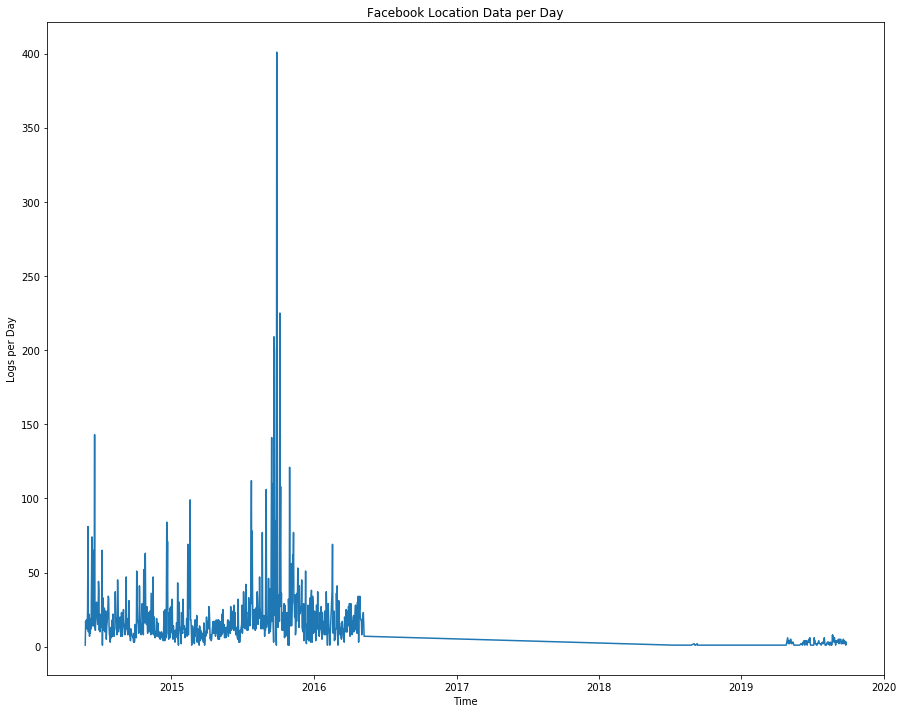

In [179]:
# Plotting location logs per day over time 
from datetime import datetime
fig, ax = plt.subplots(figsize=(15,12))

time2 = location_df['ts'].dt.floor('D')
time3 = time2.value_counts()
print(time3[:5])

a=list(time3.index.to_pydatetime())
b=list(time3)
lst=[(a[i],b[i]) for i in range(len(b))]
lst.sort()
x=[i[0] for i in lst]
y=[i[1] for i in lst]

#plt.ylim(top=40)
plt.title('Facebook Location Data per Day')
plt.xlabel('Time')
plt.ylabel('Logs per Day')
#plt.yscale('log')
ax.plot(x,y)
plt.savefig('location_tracking_over_time6.png')

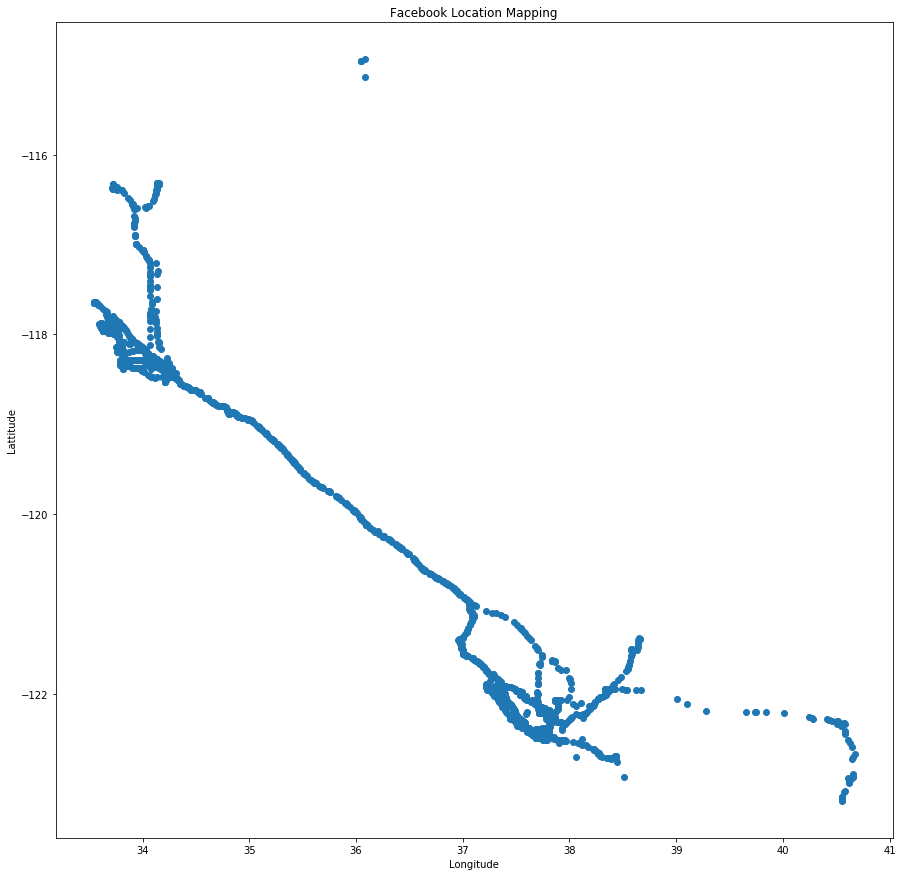

In [11]:
fig, ax = plt.subplots(figsize=(15,15))

plt.title('Facebook Location Mapping')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.plot(lat_list,lng_list, 'o')
plt.savefig('raw_location_plot2.png')

In [12]:
import folium
import geopandas as gpd
from folium import plugins

point_lst=[(lat_list[i],lng_list[i]) for i in range(len(lng_list))]

map_all = folium.Map(tiles='OpenStreetMap', location=[np.mean(lat_list), np.mean(lng_list)], zoom_start=6)
map_all.add_child(plugins.HeatMap(data=point_lst))

In [13]:
map_all = folium.Map(tiles='OpenStreetMap', location=[np.mean(lat_list), np.mean(lng_list)], zoom_start=6)
map_all.add_child(plugins.PolyLineOffset(locations=point_lst))

In [14]:
searches_df = pd.DataFrame(search_hist_table.find_one()['searches'])
searches_df['ts'] = pd.to_datetime(searches_df['timestamp'], unit='s')
searches_df.head()

,attachments,data,timestamp,title,ts
0,"[{'data': [{'text': '""alexis rutledge""'}]}]",[{'text': 'alexis rutledge'}],1584715731,You searched Facebook,2020-03-20 14:48:51
1,"[{'data': [{'text': '""stu kosh""'}]}]",[{'text': 'stu kosh'}],1584065477,You searched Facebook,2020-03-13 02:11:17
2,"[{'data': [{'text': '""Anna Laclergue""'}]}]",[{'text': 'Anna Laclergue'}],1581373518,You searched Facebook,2020-02-10 22:25:18
3,"[{'data': [{'text': '""Anna Laclergue""'}]}]",[{'text': 'Anna Laclergue'}],1581373497,You searched Facebook,2020-02-10 22:24:57
4,"[{'data': [{'text': '""anna laclergue""'}]}]",[{'text': 'anna laclergue'}],1581373495,You searched Facebook,2020-02-10 22:24:55


In [15]:
searches_list = list(searches_df['data'])
#print(searches_list[:5])
searches_txt = []
for search in searches_list:
    if not isinstance(search,float):
        #print(search)
        for itm in search:
            if 'text' in itm:
                searches_txt.append(itm['text'].lower())
#print(searches_txt)

In [16]:
searchCount_dict = {}
for search in searches_txt:
    if search in searchCount_dict:
        searchCount_dict[search] += 1
    else:
        searchCount_dict[search] = 1
print(len(searchCount_dict), "\n")
#print(searchCount_dict)
#sorted_search_dict = sorted(searchCount_dict.values(), reverse=True)
#print(sorted_search_dict)
#print(sorted(searchCount_dict.values(), reverse=True))
# for k, v in sorted(searchCount_dict.items(), reverse=True) :
#      print(k , " ::" , v )

483 



In [17]:
# Top search queries by me are:
# diana carr(29), removed from reality(16), alexis rutlidge(15), chris riggins(13), arg zombies(12), brett icus(9), 
# eco(9), removed from reality: afghanistan and back(9), kaseem bentley(9), neo(8), jackson mcbrayer(8)

In [185]:
word_df = pd.DataFrame(searchCount_dict, index=[0]).transpose().sort_values(by=0, ascending=False)
word_df.rename(columns={0:"searches"})
word_df.head(10)

,0
diana carr,29
removed from reality,16
alexis rutledge,15
chris riggins,13
arg zombies,12
removed from reality: afghanistan and back,9
brett icus,9
eco,9
kaseem bentley,9
david o'hagan,8


In [19]:
# Going after all of the messages in the inbox directory

In [111]:
import json
import os

directory_to_check = "data/facebook-owenmorris/messages/inbox/" # Which directory do you want to start with?

all_msgs_arr = []

def find_message_json(directory):
    #print(os.getcwd())
    try:
        with open(os.getcwd()+'/message_1.json') as f:
            d = json.load(f)
            all_msgs_arr.append(d)
    except IOError:
        print('no message_1.json file found')
    try:
        with open(os.getcwd()+'/message_2.json') as f:
            d = json.load(f)
            all_msgs_arr.append(d)
            print("found a message_2.json file")
    except IOError:
        print("this is a do something placeholder")
    try:
        with open(os.getcwd()+'/message_3.json') as f:
            d = json.load(f)
            all_msgs_arr.append(d)
            print("found a message_3.json file")
    except IOError:
        pass

# Get all the subdirectories of directory_to_check recursively and store them in a list:
directories = [os.path.abspath(x[0]) for x in os.walk(directory_to_check)]
directories.remove(os.path.abspath(directory_to_check)) # If you don't want your main directory included

for i in directories:
    #print(i)
    os.chdir(i)         # Change working Directory
    find_message_json(i)      # Run your function

this is a do something placeholder
no message_1.json file found
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
no messag

this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do so

no message_1.json file found
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
no message_1.json file found
this is a do something placeholder
this is a do something placeholder
this is a do something placeholder
this is a do so

In [112]:
#print(directories)
all_msgs_df = pd.io.json.json_normalize(all_msgs_arr)
print(all_msgs_df.count())
all_msgs_df.head()

is_still_participant    684
messages                684
participants            684
thread_path             684
thread_type             684
title                   684
dtype: int64


,is_still_participant,messages,participants,thread_path,thread_type,title
0,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Tatjana Vejnovic'}, {'name': 'Tyler...",inbox/TatjanaVejnovic_W5uRvhK1wQ,Regular,Tatjana Vejnovic
1,True,"[{'sender_name': 'Facebook User', 'timestamp_m...","[{'name': 'Facebook User'}, {'name': 'Tyler Mo...",inbox/FacebookUser_qqeNdKUUOQ,Regular,Facebook User
2,True,"[{'sender_name': 'Debbie Stirsman', 'timestamp...","[{'name': 'Debbie Stirsman'}, {'name': 'Tyler ...",inbox/DebbieStirsman_ZThhc1-TbA,Regular,Debbie Stirsman
3,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Jerilee Mallari'}, {'name': 'Tyler ...",inbox/JerileeMallari_WcwcbSm7YA,Regular,Jerilee Mallari
4,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Facebook User'}, {'name': 'Tyler Mo...",inbox/FacebookUser_c2D6Im_jIA,Regular,Facebook User


In [113]:
# Change working directory back to the messages root, and save out the entire dataframe as a CSV for backup
os.chdir('/Users/owenmorris/Documents/Galvanize_wd/capstone1/data/facebook-owenmorris/messages')
os.getcwd()
all_msgs_df.to_csv('all_fb_msgs.csv')

In [69]:
# Looking at all the names in messages to build a filter list.
s = ''
for itm in all_msgs_df['title']:
    s += str(itm) + ' | '
print(s)

Tatjana Vejnovic | Facebook User | Debbie Stirsman | Jerilee Mallari | Facebook User | Ryan Healy | Benjamin Froehlich | Michaela Francom | Ian Philip James | Sarah Elizabeth Gelesko | EJ Allen | Molly Muldoon Rebholz | Amy Elizabeth James, Facebook User, Jonathan Fischer and 6 others | Facebook User | Bert Jennings | Facebook User | Handell DÃ©sulmÃ© | Facebook User | Facebook User | Albert Carrasco III | Kevin Munroe | Tracy Nguyen, TammyTea Love, Janesh Rahlan and 21 others | Facebook User | Enrique A. Fuentes | John Rollo | Emma Louise and Janet Michaelis | Facebook User | Ian McGee | Facebook User | Leo Zinger | Scott Passin | Cassandra Inglesby | Brett Icus and Sarah Elizabeth Gelesko | Anton BergstrÃ¶m | Facebook User | Facebook User | Michael Caples | Messenger | Bryan Hunter | Benjamin Froehlich, Sara Torgison, Matt Jameson and Trevor Morris | Myran Michaelis | R.J. DaPrato | Vicky Hibbard | Dave DeLuca | Ryan Rollo | Facebook User | Facebook User | Maureen Petterson, Kristin 

In [70]:
vet_list = ['Albert Carrasco III', 'Brett Icus and Sarah Elizabeth Gelesko', 'Sarah Elizabeth Gelesko', 'R.J. DaPrato', 'John Byington', 'John Byington', 'Stu Kosh', 'Christopher A. Raheb', 'Jordan Doty', 'Ydoc Retsof', 'Ssab Ecyrb', 'Chris Mckeehan', 'Tim Brink', 'Chris Barylick', 'Jsh SevLa', 'Michael Cummings', 'Owen Huang', 'IvÃ¡n Moraarmenta', 'Fred Mastison', 'Tony Alonzo', 'Garth Massey', 'Peter Anthony Gutierrez', 'Brian Dolan', 'Hans Allen', 'Dustin Bayham', 'Ed Burns', 'Merlin Micken', 'Jon Anderson', 'Henry Lazo', 'Chris Chung', 'Jason Park', 'David Jon Brown', 'Jonathan Buenaflor', 'Raj Lotliker', 'John Kaing', 'JC Aglugub', 'Jimmy Shea', 'Carlos Eduardo Ruiz', 'Ev Gwav', 'Tyler Jay Satterfield', 'Percy Rolando EnequeSalazar', 'Kleetus Dolan', 'Noah Peczeli', 'Michael McCoy', 'Jared Nunnally', 'Grant Russell Kemper', 'John Brown', 'Daniel Dancer', 'Alan Dutch Schaefer', 'Devon Read James', 'Justin Madsen', 'Devin P. Halverson', 'Justin Horchler', "David O'Hagan", 'Anthony Mercado', 'Eric Gonzo', 'David Vanderpol', 'Javier Leal', 'Daniel Clontz', 'Esteban Tocino', 'Turk Escalada', 'Paul K. Chappell', 'Carter Larkin', 'Mike Whiter', 'Martin Lopez', 'Jesse Aguilar', 'Gregory Michael', 'Travis M Schlotterbeck', 'Nathan Wright', 'Jim Loosli', 'Justin Diedolf', 'Brett Icus', 'Borquez Christopher', 'Raul Carmenate', 'Richard Dreyling','Daniel Ruiz', 'Paul Bennett']
print(len(vet_list))

77

In [114]:
# extract some information from the nested DataFrame
all_msgs_df['participant_count'] = all_msgs_df['participants'].map(lambda x : len(x))
all_msgs_df['msg_count'] = all_msgs_df['messages'].map(lambda x : len(x))
all_msgs_df['vets'] = all_msgs_df['title'].map(lambda x : 1 if x in vet_list else 0)
all_msgs_df['thread_path'] = all_msgs_df['thread_path'].map(lambda x: x.split('/')[-1])
all_msgs_df.head()

,is_still_participant,messages,participants,thread_path,thread_type,title,participant_count,msg_count,vets
0,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Tatjana Vejnovic'}, {'name': 'Tyler...",TatjanaVejnovic_W5uRvhK1wQ,Regular,Tatjana Vejnovic,2,1020,0
1,True,"[{'sender_name': 'Facebook User', 'timestamp_m...","[{'name': 'Facebook User'}, {'name': 'Tyler Mo...",FacebookUser_qqeNdKUUOQ,Regular,Facebook User,2,15,0
2,True,"[{'sender_name': 'Debbie Stirsman', 'timestamp...","[{'name': 'Debbie Stirsman'}, {'name': 'Tyler ...",DebbieStirsman_ZThhc1-TbA,Regular,Debbie Stirsman,2,2,0
3,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Jerilee Mallari'}, {'name': 'Tyler ...",JerileeMallari_WcwcbSm7YA,Regular,Jerilee Mallari,2,1,0
4,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Facebook User'}, {'name': 'Tyler Mo...",FacebookUser_c2D6Im_jIA,Regular,Facebook User,2,19,0


In [115]:
import scipy.stats as stats
vet_sample = all_msgs_df[all_msgs_df['vets']==1]
vet_sample = vet_sample[vet_sample['participant_count']==2]
#vet_sample = vet_sample[vet_sample['msg_count']<9999]
civ_sample = all_msgs_df[all_msgs_df['vets']==0]
civ_sample = civ_sample[civ_sample['participant_count']==2]
#civ_sample = civ_sample[civ_sample['msg_count']<9999]

dist = stats.mannwhitneyu(vet_sample['msg_count'], civ_sample['msg_count'], alternative="greater")
dist

MannwhitneyuResult(statistic=21225.0, pvalue=0.09940696405027971)

In [116]:
v_m = vet_sample['msg_count'].mean()
v_std = vet_sample['msg_count'].std()
c_m = civ_sample['msg_count'].mean()
c_std = civ_sample['msg_count'].std()

print(v_m, v_std, c_m, c_std)

356.5 1627.2066576396087 165.591796875 871.7457524524444


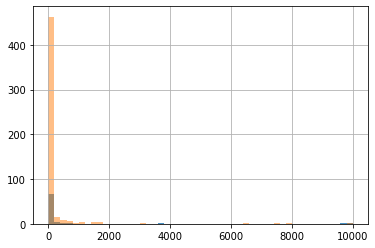

In [117]:
vet_sample['msg_count'].hist(bins=50,alpha=0.8)
civ_sample['msg_count'].hist(bins=50,alpha=0.5)

In [77]:
groups = all_msgs_df.groupby('vets')
print(groups['msg_count'].sum())
print(groups['msg_count'].count())

vets
0    79327
1    27095
Name: msg_count, dtype: int64
vets
0    606
1     77
Name: msg_count, dtype: int64


In [110]:
avg_vet_msgs = groups['msg_count'].sum()[1] / groups['msg_count'].count()[1]
avg_civ_msgs = groups['msg_count'].sum()[0] / groups['msg_count'].count()[0]

print("My average number of messages exchanged with veterans is {:2.2f}.".format(avg_vet_msgs))
print("My average number of messages exchanged with non-veterans is {:2.2f}.".format(avg_civ_msgs))

My average number of messages exchanged with veterans is 351.88.
My average number of messages exchanged with non-veterans is 130.90.


In [134]:
most_chatty_df = all_msgs_df.sort_values('msg_count', ascending=False)
most_chatty_df.head(10)

,is_still_participant,messages,participants,thread_path,thread_type,title,participant_count,msg_count,vets
444,True,"[{'sender_name': 'Trevor Morris', 'timestamp_m...","[{'name': 'Trevor Morris'}, {'name': 'Tyler Mo...",TrevorMorris_L72oXlkFIQ,Regular,Trevor Morris,2,10000,0
445,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Trevor Morris'}, {'name': 'Tyler Mo...",TrevorMorris_L72oXlkFIQ,Regular,Trevor Morris,2,10000,0
413,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'David O'Hagan'}, {'name': 'Tyler Mo...",DavidOHagan_7WX4OcSqEg,Regular,David O'Hagan,2,10000,1
414,True,"[{'sender_name': 'David O'Hagan', 'timestamp_m...","[{'name': 'David O'Hagan'}, {'name': 'Tyler Mo...",DavidOHagan_7WX4OcSqEg,Regular,David O'Hagan,2,9688,1
677,True,"[{'sender_name': 'Whitney Lauritsen', 'timesta...","[{'name': 'Whitney Lauritsen'}, {'name': 'Tyle...",WhitneyLauritsen_YfHRUIzEAw,Regular,Whitney Lauritsen,2,7871,0
446,True,"[{'sender_name': 'Trevor Morris', 'timestamp_m...","[{'name': 'Trevor Morris'}, {'name': 'Tyler Mo...",TrevorMorris_L72oXlkFIQ,Regular,Trevor Morris,2,7554,0
421,True,"[{'sender_name': 'Gary Douglas', 'timestamp_ms...","[{'name': 'Gary Douglas'}, {'name': 'Tyler Mor...",GaryDouglas_7ebc7tRmsQ,Regular,Gary Douglas,2,6415,0
61,True,"[{'sender_name': 'Chris Barylick', 'timestamp_...","[{'name': 'Chris Barylick'}, {'name': 'Tyler M...",ChrisBarylick_cEf7KNwrWg,Regular,Chris Barylick,2,3654,1
313,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Janet Michaelis'}, {'name': 'Tyler ...",JanetMichaelis_PiJFLH0MUQ,Regular,Janet Michaelis,2,3184,0
442,True,"[{'sender_name': 'Anthony Nichols', 'timestamp...","[{'name': 'Anthony Nichols'}, {'name': 'Tyler ...",AnthonyNichols_9gVNwQ4x0w,Regular,Anthony Nichols,2,1797,0


In [177]:
# Manually consolidating the handfull of repeat entries.
most_chatty_df.at[444,'msg_count'] = 27554 #update Trevor
most_chatty_df.at[413,'msg_count'] = 19688 #update David

consolidated_df = most_chatty_df.drop([445, 414, 446]) #remove the duplicate entries
consolidated_df.head(20)

,is_still_participant,messages,participants,thread_path,thread_type,title,participant_count,msg_count,vets
444,True,"[{'sender_name': 'Trevor Morris', 'timestamp_m...","[{'name': 'Trevor Morris'}, {'name': 'Tyler Mo...",TrevorMorris_L72oXlkFIQ,Regular,Trevor Morris,2,27554,0
413,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'David O'Hagan'}, {'name': 'Tyler Mo...",DavidOHagan_7WX4OcSqEg,Regular,David O'Hagan,2,19688,1
677,True,"[{'sender_name': 'Whitney Lauritsen', 'timesta...","[{'name': 'Whitney Lauritsen'}, {'name': 'Tyle...",WhitneyLauritsen_YfHRUIzEAw,Regular,Whitney Lauritsen,2,7871,0
421,True,"[{'sender_name': 'Gary Douglas', 'timestamp_ms...","[{'name': 'Gary Douglas'}, {'name': 'Tyler Mor...",GaryDouglas_7ebc7tRmsQ,Regular,Gary Douglas,2,6415,0
61,True,"[{'sender_name': 'Chris Barylick', 'timestamp_...","[{'name': 'Chris Barylick'}, {'name': 'Tyler M...",ChrisBarylick_cEf7KNwrWg,Regular,Chris Barylick,2,3654,1
313,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Janet Michaelis'}, {'name': 'Tyler ...",JanetMichaelis_PiJFLH0MUQ,Regular,Janet Michaelis,2,3184,0
442,True,"[{'sender_name': 'Anthony Nichols', 'timestamp...","[{'name': 'Anthony Nichols'}, {'name': 'Tyler ...",AnthonyNichols_9gVNwQ4x0w,Regular,Anthony Nichols,2,1797,0
658,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'John Reynolds'}, {'name': 'Tyler Mo...",JohnReynolds_Cmf44H4XOg,Regular,John Reynolds,2,1795,0
341,True,"[{'sender_name': 'Tyler Morris', 'timestamp_ms...","[{'name': 'Keith D'soÃ¼za'}, {'name': 'Tyler M...",KeithDsouza_iOcIdyYueg,Regular,Keith D'soÃ¼za,2,1793,0
560,True,"[{'sender_name': 'Mary Elizabeth Miller', 'tim...","[{'name': 'Mary Elizabeth Miller'}, {'name': '...",MaryElizabethMiller_wxp4zqqlzA,Regular,Mary Elizabeth Miller,2,1624,0


In [176]:
import scipy.stats as stats

vet_sample = consolidated_df[consolidated_df['vets']==1]
vet_sample = vet_sample[vet_sample['participant_count']==2]
#vet_sample = vet_sample[vet_sample['msg_count']<9999]
civ_sample = consolidated_df[consolidated_df['vets']==0]
civ_sample = civ_sample[civ_sample['participant_count']==2]
#civ_sample = civ_sample[civ_sample['msg_count']<9999]

dist = stats.mannwhitneyu(vet_sample['msg_count'], civ_sample['msg_count'], alternative="two-sided")
dist

MannwhitneyuResult(statistic=20713.0, pvalue=0.24344629388209704)

In [175]:
res = stats.ttest_ind(vet_sample['msg_count'], civ_sample['msg_count'])
res

Ttest_indResult(statistic=1.0631131912202756, pvalue=0.2881707704269806)

In [187]:
v_m = vet_sample['msg_count'].mean()
v_std = vet_sample['msg_count'].std()
c_m = civ_sample['msg_count'].mean()
c_std = civ_sample['msg_count'].std()

print("Veteran communication averages {:2.2f} messages with a deviation of {:2.2f}, \nand Civilian communication averages {:2.2f} messages with a {:2.2f} deviation.\nTotal veteran chats: {} and total civilians: {}.".format(v_m, v_std, c_m, c_std, vet_sample['msg_count'].count(), civ_sample['msg_count'].count()))

Veteran communication averages 361.25 messages with a deviation of 2302.22, 
and Civilian communication averages 166.24 messages with a 1322.64 deviation.
Total veteran chats: 75 and total civilians: 510.


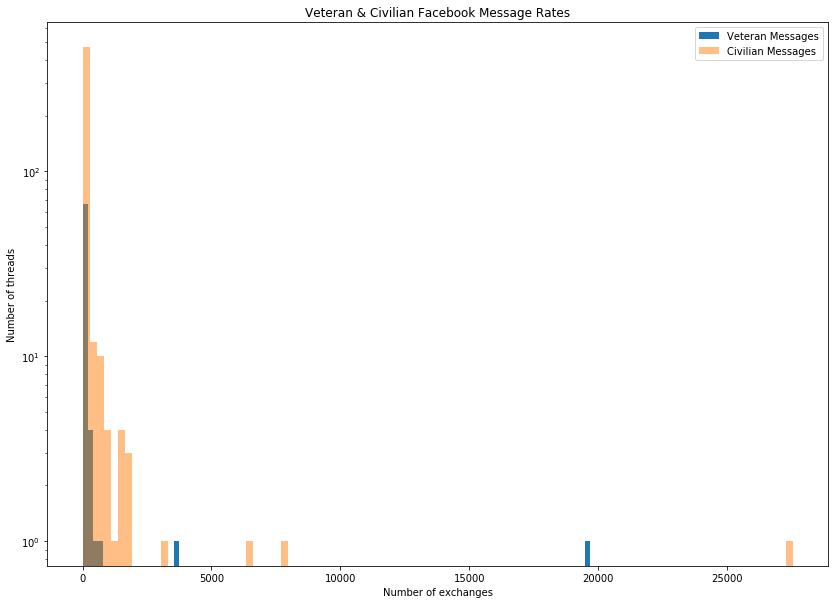

In [194]:
os.chdir('/Users/owenmorris/Documents/Galvanize_wd/capstone1/images')
fig, axs = plt.subplots(1, figsize=(14,10))
plt.title('Veteran & Civilian Facebook Message Rates')
#plt.xlabel('Time')
#plt.ylabel('Logs per Day')
plt.yscale('log')
#plt.xlim(0,1000)
#plt.ylim(0,100)

axs.hist(vet_sample['msg_count'], label='Veteran Messages', alpha=1.0, bins=100)
axs.hist(civ_sample['msg_count'], label='Civilian Messages', alpha=0.5, bins=100)
axs.set_xlabel('Number of exchanges')
axs.set_ylabel('Number of threads')
axs.legend()
plt.savefig('Vet-v-Civ_FB_Message_rates4.png')

In [25]:
# Going after the mailbox information from Google now.
os.chdir('/Users/owenmorris/Documents/Galvanize_wd/capstone1')
import mailbox
mbox = mailbox.mbox('data/Gmail/all_gmail.mbox')

In [26]:
print("Google has retained {} of my email communications.".format(str(len(mbox))))

Google has retained 60028 of my email communications.


In [27]:
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'Received',
 'Received',
 'Content-Type',
 'Date',
 'From',
 'Mime-Version',
 'To',
 'Message-ID',
 'Subject',
 'X-SG-EID',
 'X-SG-ID',
 'X-Feedback-ID']

In [28]:
emails_to = []
emails_from = []
e_to_from_sub = []
for message in mbox:
    _to = str(message['to']).lower()
    _from = str(message['from']).lower()
    _sub = str(message['Subject']).lower()
    emails_to.append(_to)
    emails_from.append(_from)
    e_to_from_sub.append([_to,_from,_sub])

In [29]:
print(emails_to[:20])
print('\n')
print(emails_from[:20])

['theowenmorris@gmail.com', 'tyler morris <theowenmorris@gmail.com>', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', '<theowenmorris@gmail.com>', 'theowenmorris@gmail.com', '<theowenmorris@gmail.com>', 'tyler morris <theowenmorris@gmail.com>', 'theowenmorris@gmail.com', '"tyler (owen) morris" <theowenmorris@gmail.com>', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'tyler morris <theowenmorris@gmail.com>', 'theowenmorris@gmail.com', '"theowenmorris@gmail.com" <theowenmorris@gmail.com>', '=?utf-8?q?tyler?= <theowenmorris@gmail.com>', '=?utf-8?q?tyler?= <theowenmorris@gmail.com>', 'theowenmorris@gmail.com', '"tyler (owen) morris" <theowenmorris@gmail.com>', 'tyler morris <theowenmorris@gmail.com>']


['"alignable" <noreply@email.alignable.com>', 'youtube <noreply@youtube.com>', 'casting networks <marketing@castingnetworks.com>', 'slated <noreply@slated.com>', '"etsy" <emails@e.etsy.com>', 'loot crate <newsletter@e.lootcrate.com>', '=?utf-8?q?high=20times?= <noreply@hightim

In [30]:
# Cleaning the email addresses from the strings.
import re

regex = re.compile(("([a-z0-9!#$%&'*+\/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+\/=?^_`"
                    "{|}~-]+)*(@|\sat\s)(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?(\.|"
                    "\sdot\s))+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?)"))
def get_emails(s):
    z = re.match(regex,s)
    if z:
        return z.groups()[0]
    #return (email[0] for email in re.findall(regex, s) if not email[0].startswith('//'))

clean_to_emails, clean_from_emails = [], []

for st in emails_to:
    if get_emails(st) != None:
        clean_to_emails.append(get_emails(st))

for st in emails_from:
    if get_emails(st) != None:
        clean_from_emails.append(get_emails(st))
    
print(len(clean_to_emails), len(clean_from_emails))
print(clean_to_emails[:30])
print(clean_from_emails[:30])

42037 14182
['theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'sf-gamedevelopment-meetup-group-announce@meetup.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com', 'theowenmorris@gmail.com']
['projectnotices@castingnetworks.com', 'projectnotices@castingnetworks.com', 'projectnotices@castingnetworks.com', 'igor@filmologic.com', 'projectnot

In [31]:
# Counting the email addresses
email_to_count_dict = {}
email_from_count_dict = {}

for em in clean_to_emails:
    if em in email_to_count_dict:
        email_to_count_dict[em] += 1
    else:
        email_to_count_dict[em] = 1
        
for em in clean_from_emails:
    if em in email_from_count_dict:
        email_from_count_dict[em] += 1
    else:
        email_from_count_dict[em] = 1
        
# setup a filter
to_filter = ['theowenmorris@gmail.com','owen@argzombies.com','projectnotices@castingnetworks.com'] # it's my email account- of course they're all to me.
for filt in to_filter:
    if filt in email_to_count_dict:
        del email_to_count_dict[filt]

from_filter = ['root@a2plcpnl0669.prod.iad2.secureserver.net','projectnotices@castingnetworks.com']
for filt in from_filter:
    if filt in email_from_count_dict:
        del email_from_count_dict[filt]
        

to_email_df = pd.DataFrame(email_to_count_dict, index=[0]).transpose().sort_values(by=0, ascending=False)
to_email_df.head(10)

from_email_df = pd.DataFrame(email_from_count_dict, index=[0]).transpose().sort_values(by=0, ascending=False)
from_email_df.head(10)

,0
orders@eat.grubhub.com,99
no-reply@unity3d.com,99
noreply@sfrent.net,41
noreply@edd.ca.gov,31
trackingupdates@fedex.com,29
purchasesupport@twitch.tv,28
igor@filmologic.com,25
no_reply@bayareafastrak.org,20
noreply@craigslist.org,13
pngtree@email.pngtree.com,10


In [32]:
to_email_df.head(10)

,0
game-and-app-devs-list@meetup.com,18
bay-area-cannabis-entrepreneurs-announce@meetup.com,15
dockalee@gmail.com,15
game-and-app-devs-announce@meetup.com,14
hlb1@mindspring.com,13
joanna.amick@gmail.com,12
trevormorrissound@gmail.com,11
mark@arclg.com,11
rwjmm-6114121268@hous.craigslist.org,10
contact@argzombie.com,9


In [34]:
# Now we wrangle the Twitter Data
os.getcwd()

'/Users/owenmorris/Documents/Galvanize_wd/capstone1'

In [50]:
tweets_df = pd.read_json('data/twitter/data/tweet.json')
tweets_df['full_text'] = tweets_df['tweet'].map(lambda x : x['full_text'])
tweets_df['favorite_count'] = tweets_df['tweet'].map(lambda x : x['favorite_count'])
tweets_df['retweet_count'] = tweets_df['tweet'].map(lambda x : x['retweet_count'])
tweets_df['created_at'] = tweets_df['tweet'].map(lambda x : pd.to_datetime(x['created_at']))
tweets_df.head()

,tweet,full_text,favorite_count,retweet_count,created_at
0,"{'retweeted': False, 'source': '<a href=""http:...",This is the worst Apocalypse ever... I was pro...,1,0,2020-03-27 19:49:13
1,"{'retweeted': False, 'source': '<a href=""http:...",What Representing Men in Divorce Taught Me Abo...,1,0,2020-03-25 03:54:30
2,"{'retweeted': False, 'source': '<a href=""http:...",@lesliejmarshall @sarisataka @Pierce1215 Your ...,0,0,2020-03-24 02:38:39
3,"{'retweeted': False, 'source': '<a href=""http:...",@Acidsmooth We know exactly who this series is...,0,0,2020-03-24 02:24:11
4,"{'retweeted': False, 'source': '<a href=""http:...",Seen “Paradise PD” on Netflix yet?\n\nhttps://...,1,0,2020-03-24 02:13:27


2019-03-24    119
2020-02-22    106
2019-02-13    105
2019-07-04     80
2020-02-09     69
Name: created_at, dtype: int64


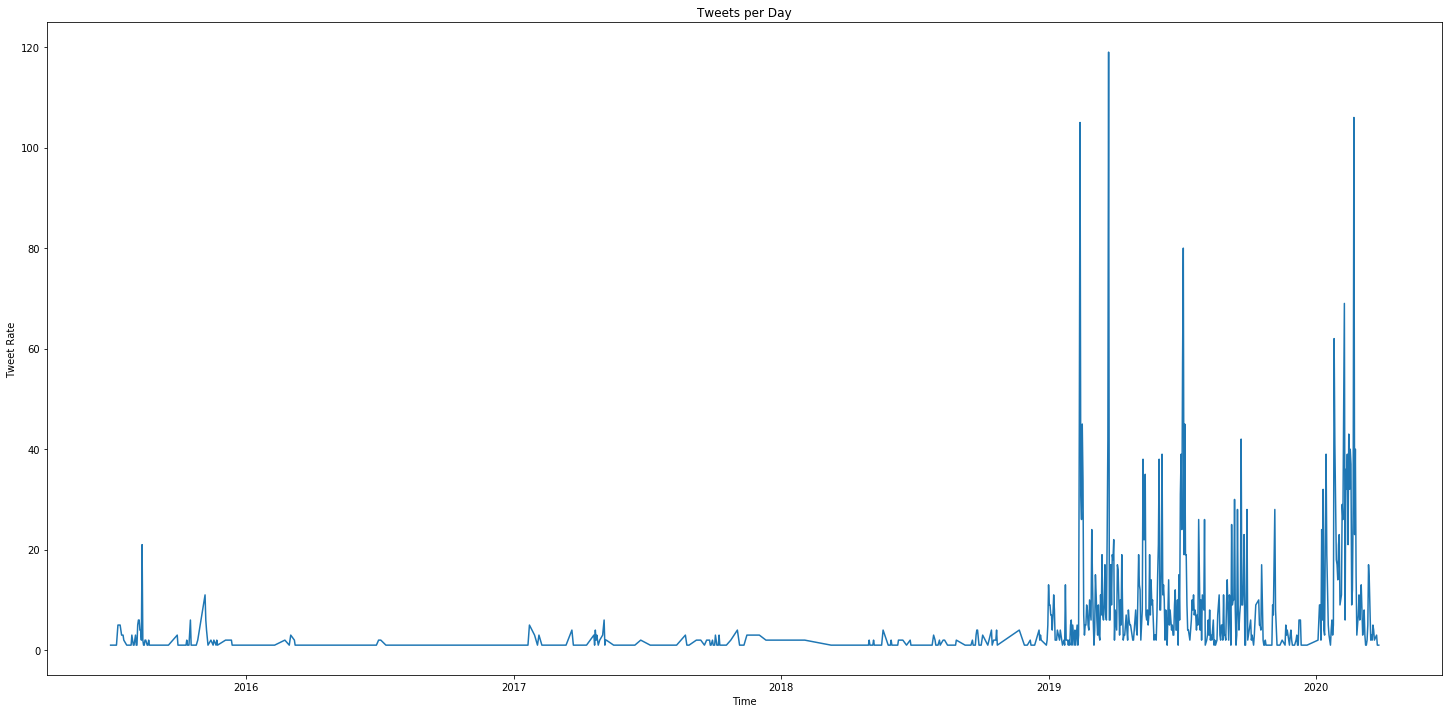

In [63]:
fig, ax = plt.subplots(figsize=(25,12))

time2 = tweets_df['created_at'].dt.floor('D')
time3 = time2.value_counts()
print(time3[:5])

a=list(time3.index.to_pydatetime())
b=list(time3)
lst=[(a[i],b[i]) for i in range(len(b))]
lst.sort()
x=[i[0] for i in lst]
y=[i[1] for i in lst]

#plt.ylim(top=40)
plt.title('Tweets per Day')
plt.xlabel('Time')
plt.ylabel('Tweet Rate')
#plt.yscale('log')
ax.plot(x,y)
plt.savefig('Tweet_rate1.png')

In [51]:
pop_tweet_df = tweets_df.sort_values('favorite_count', ascending=False)
pop_tweet_df.head()

,tweet,full_text,favorite_count,retweet_count,created_at
2231,"{'retweeted': False, 'source': '<a href=""http:...",Why did the feminist cross the road?\n.\n.\n.\...,98,25,2020-02-16 15:33:06
3420,"{'retweeted': False, 'source': '<a href=""http:...",@TakedownMRAs @LottieLovesUK So if a woman say...,9,0,2020-01-08 22:03:39
4300,"{'retweeted': False, 'source': '<a href=""http:...",@bonjourdebbie Hating men is misandry. Misandr...,9,1,2019-07-18 13:40:20
2914,"{'retweeted': False, 'source': '<a href=""http:...",@JudgementSchool @TakedownMRAs @BrandonLBradfo...,9,0,2020-02-06 03:21:15
3096,"{'retweeted': False, 'source': '<a href=""http:...",@SaidRick4 @marie_skou @gamingmentor101 I coul...,9,0,2020-03-01 23:51:59


In [44]:
dms_df = pd.read_json('data/twitter/data/direct-messages.json')
dms_df['message_count'] = dms_df['dmConversation'].map(lambda x : len(x['messages']))
dms_df['recipiant'] = dms_df['dmConversation'].map(lambda x : x['conversationId'].split('-')[0])
dms_df.head()

,dmConversation,message_count,recipiant
0,"{'conversationId': '681813-2916025898', 'messa...",3,681813
1,"{'conversationId': '6661012-2916025898', 'mess...",409,6661012
2,"{'conversationId': '116874686-2916025898', 'me...",4,116874686
3,"{'conversationId': '123748310-2916025898', 'me...",7,123748310
4,"{'conversationId': '206941701-2916025898', 'me...",265,206941701


In [47]:
most_dms_df = dms_df.sort_values('message_count', ascending=False)
most_dms_df.head(10)

,dmConversation,message_count,recipiant
1,"{'conversationId': '6661012-2916025898', 'mess...",409,6661012
4,"{'conversationId': '206941701-2916025898', 'me...",265,206941701
22,"{'conversationId': '2916025898-4113746176', 'm...",231,2916025898
39,"{'conversationId': '17417076-2916025898', 'mes...",220,17417076
31,{'conversationId': '2916025898-111012482403303...,193,2916025898
12,"{'conversationId': '14923671-2916025898', 'mes...",128,14923671
43,"{'conversationId': '74451585-2916025898', 'mes...",111,74451585
38,{'conversationId': '2916025898-123125447888561...,80,2916025898
20,"{'conversationId': '2916025898-3552652212', 'm...",66,2916025898
29,{'conversationId': '2916025898-951100830488387...,57,2916025898
